In [1]:
import re
import pandas as pd

# Read the HTML file
with open('liked_posts.html', 'r', encoding='utf-8') as file:
    data = file.read()

# Regular expressions to extract the data
pattern = re.compile(r'<div class="_3-95 _2pim _a6-h _a6-i">(.*?)</div>.*?href="(https://www\.instagram\.com/[^"]+)">👍</a></div><div>(.*?)</div>', re.DOTALL)

# Extract matches
matches = pattern.findall(data)

# Parse matches into a structured list
parsed_data = [{"Username": match[0], "Post URL": match[1], "Date and Time": match[2]} for match in matches]

# Convert to a DataFrame
df = pd.DataFrame(parsed_data)

# Display or save as needed
print(df.head(10))

# Save to CSV
df.to_csv("liked_posts.csv", index=False)


             Username                                     Post URL  \
0      xristina_sou11     https://www.instagram.com/p/DEfh0MjoVSU/   
1           tbinishi_     https://www.instagram.com/p/DEc8NdAJ3Dg/   
2  korneliacikalleshi     https://www.instagram.com/p/DEaqU1iNjLr/   
3         melisa.gora     https://www.instagram.com/p/DEaZ-gLO8BR/   
4        mirandamance     https://www.instagram.com/p/DESm0zoRybZ/   
5         marsipojani     https://www.instagram.com/p/DES2DCBN8_k/   
6          evelinna_m     https://www.instagram.com/p/DELTlhHOiv_/   
7  elonacake.dervishi     https://www.instagram.com/p/DENwiRxuDMz/   
8          megipojani     https://www.instagram.com/p/DEIGXZUNkBS/   
9             klisa_c  https://www.instagram.com/reel/DDr3lKyxSXs/   

           Date and Time  
0  Jan 06, 2025 12:41 pm  
1  Jan 05, 2025 10:12 am  
2  Jan 04, 2025 12:34 pm  
3  Jan 04, 2025 11:12 am  
4  Jan 01, 2025 11:32 am  
5  Jan 01, 2025 11:24 am  
6   Dec 30, 2024 6:38 pm  
7   Dec 30, 2

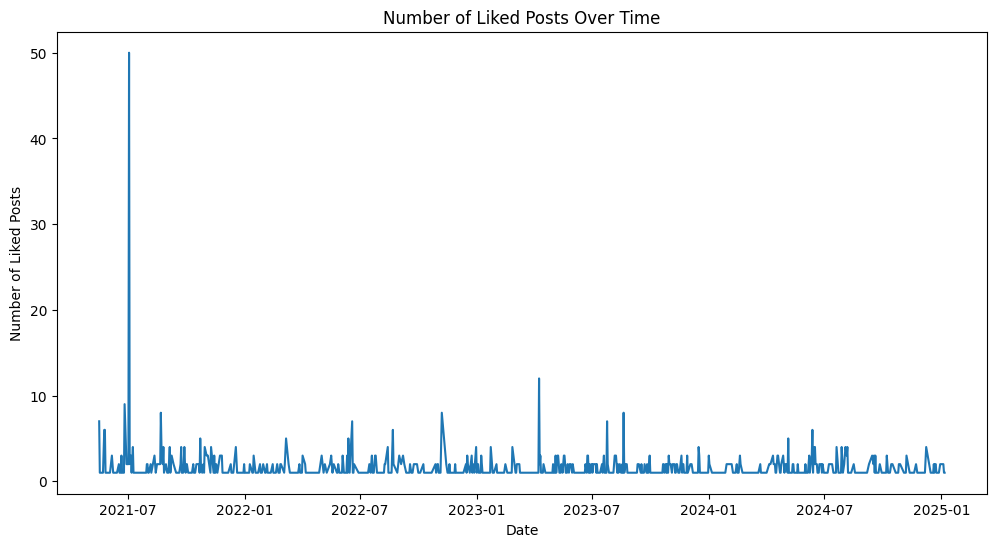

/var/folders/x4/0j0lktlj62d0g0gd01rwrbg80000gn/T/ipykernel_74952/2603158287.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=data, palette='viridis')


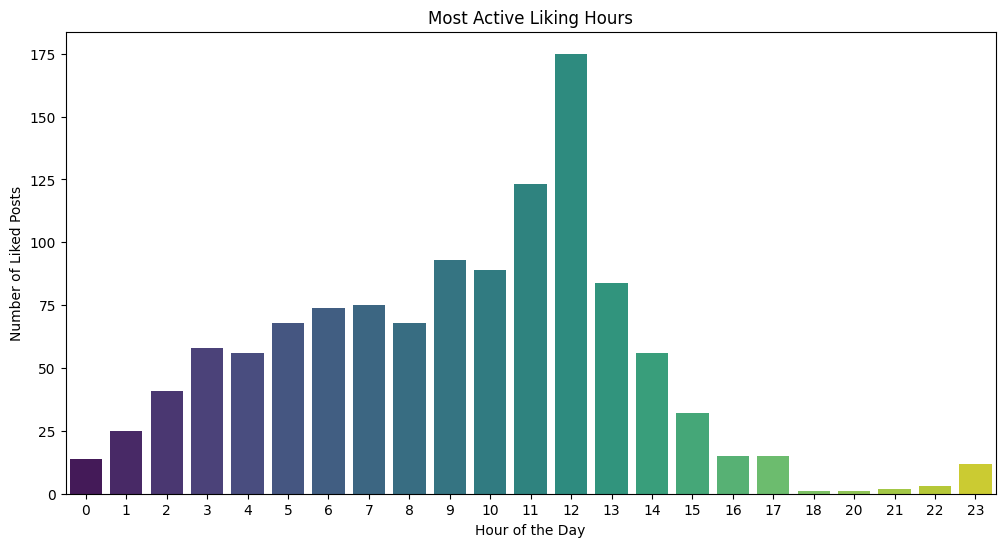

/var/folders/x4/0j0lktlj62d0g0gd01rwrbg80000gn/T/ipykernel_74952/2603158287.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


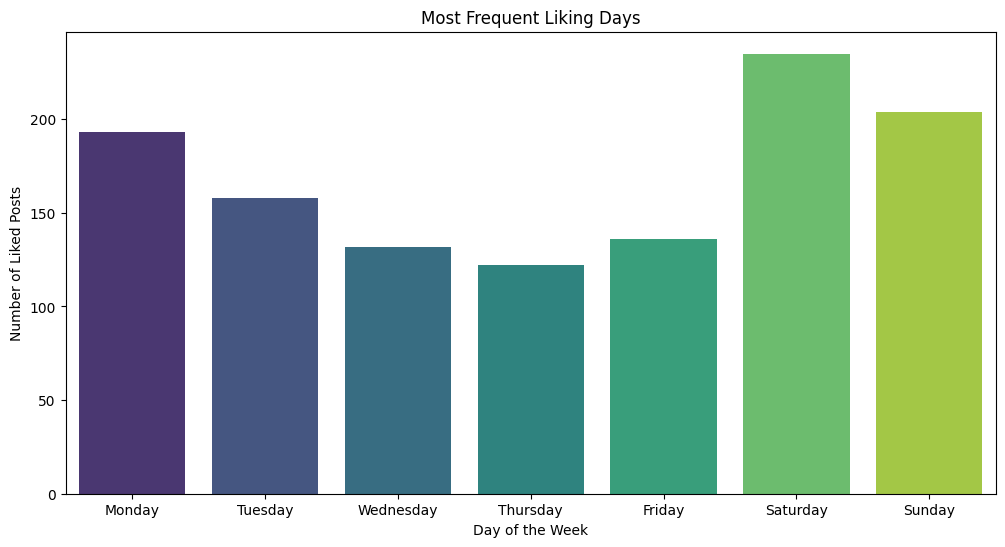

/var/folders/x4/0j0lktlj62d0g0gd01rwrbg80000gn/T/ipykernel_74952/2603158287.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')


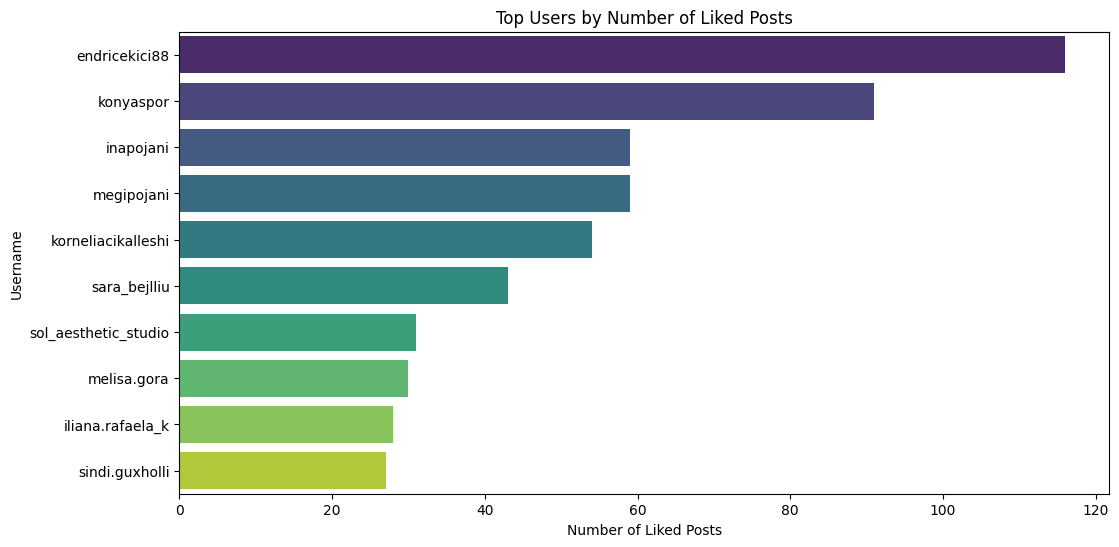

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('liked_posts.csv')

# Parse the 'Date and Time' column with the correct format
data['Date and Time'] = pd.to_datetime(data['Date and Time'], format='%b %d, %Y %I:%M %p')

# Extract date and time components
data['Date'] = data['Date and Time'].dt.date
data['Time'] = data['Date and Time'].dt.time
data['Hour'] = data['Date and Time'].dt.hour
data['Day'] = data['Date and Time'].dt.day_name()

# Plot number of liked posts over time
plt.figure(figsize=(12, 6))
data['Date'].value_counts().sort_index().plot()
plt.title('Number of Liked Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Liked Posts')
plt.show()

# Plot most active liking hours
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=data, palette='viridis')
plt.title('Most Active Liking Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Liked Posts')
plt.show()

# Plot most frequent liking days
plt.figure(figsize=(12, 6))
sns.countplot(x='Day', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title('Most Frequent Liking Days')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Liked Posts')
plt.show()

# Plot top users by number of liked posts
plt.figure(figsize=(12, 6))
top_users = data['Username'].value_counts().head(10)
sns.barplot(x=top_users.values, y=top_users.index, palette='viridis')
plt.title('Top Users by Number of Liked Posts')
plt.xlabel('Number of Liked Posts')
plt.ylabel('Username')
plt.show()